In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
def noise(data):
    noise = np.random.normal(0, np.abs(0.01 * data), size=data.shape)#noise=0; 0.01; 0.005; 0.0025
    noisy_data = data + noise
    return noisy_data

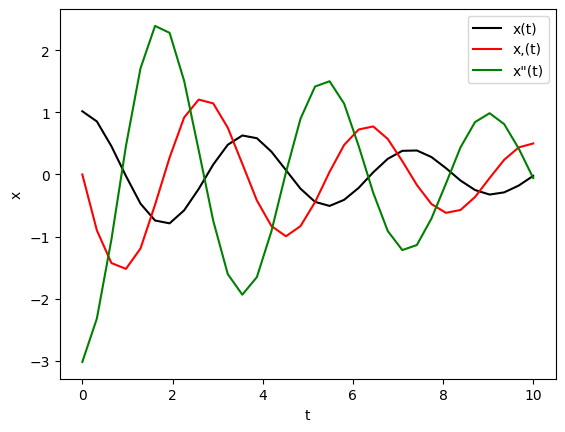

In [49]:
'''
уравнение x'' + 0.25 * x' + 3*x = 0
н.у. x(0) = 1, x'(0) = 0
'''
def solution(t):
    return ((1 / np.sqrt(191)) * np.sin((np.sqrt(191) / 8) * t) + np.cos((np.sqrt(191) / 8) * t)) * np.exp(-0.125 * t)

def first_deriv(x):
    return (- 24 * np.exp(- 0.125 * t) * np.sin((np.sqrt(191) / 8) * t)) / np.sqrt(191)

def second_deriv(x):
    return (3 * np.exp(-0.125 * t) * np.sin((np.sqrt(191) / 8) * t) / np.sqrt(191)) - (3 * np.exp(-0.125 * t) * np.cos((np.sqrt(191) / 8) * t))

t = np.linspace(0, 10, 32)
x = noise(solution(t))

dx = noise(first_deriv(t))
ddx = noise(second_deriv(t))

plt.plot(t, x, color = 'k', label = 'x(t)')
plt.plot(t, dx, color = 'r', label = 'x,(t)')
plt.plot(t, ddx, color = 'g', label = 'x"(t)')
plt.legend(loc = 'upper right')
plt.xlabel('t')
plt.ylabel('x')
plt.show()

np.save('data_ode_noise0.01_u_t.npy', dx)
np.save('data_ode_noise0.01_u_tt.npy', ddx)



In [40]:
#проверка аналитического решения и производных
3 * solution(t) + 0.25 * first_deriv(t) + second_deriv(t)

array([ 0.00000000e+00,  4.44089210e-16,  4.44089210e-16,  0.00000000e+00,
        2.22044605e-16, -4.44089210e-16,  4.44089210e-16,  2.22044605e-16,
        1.66533454e-16,  1.11022302e-16, -2.22044605e-16,  0.00000000e+00,
        0.00000000e+00,  1.11022302e-16,  0.00000000e+00,  1.11022302e-16,
        4.44089210e-16,  2.22044605e-16,  0.00000000e+00, -5.55111512e-17,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.22044605e-16, -2.77555756e-17,  5.55111512e-17, -1.11022302e-16,
        0.00000000e+00,  1.11022302e-16,  5.55111512e-17,  6.93889390e-18])

0.001784702750819684
0.022146385403846166


<function matplotlib.pyplot.show(close=None, block=None)>

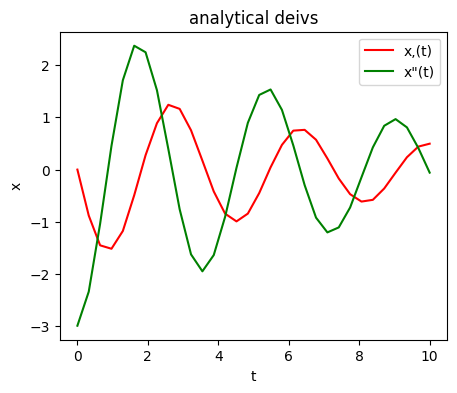

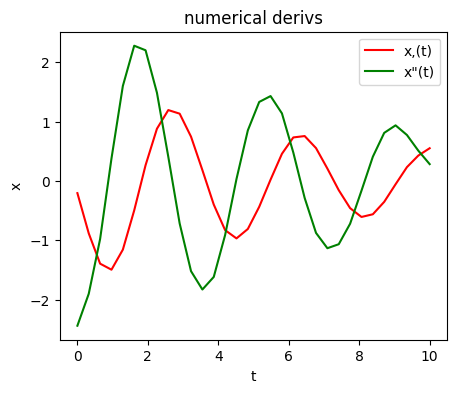

In [41]:
dt = 10 / 32
gradient_t = np.gradient(x, dt, edge_order=2)
gradient_tt = np.gradient(gradient_t, dt, edge_order=2)

print(np.square(dx - gradient_t).mean(axis=None))
print(np.square(ddx - gradient_tt).mean(axis=None))

plt.figure(1, figsize=(5, 4))
plt.plot(t, dx, color = 'r', label = 'x,(t)')
plt.plot(t, ddx, color = 'g', label = 'x"(t)')
plt.title('analytical deivs')
plt.legend(loc = 'upper right')
plt.xlabel('t')
plt.ylabel('x')
plt.show

plt.figure(2, figsize=(5, 4))
plt.plot(t, gradient_t, color = 'r', label = 'x,(t)')
plt.plot(t, gradient_tt, color = 'g', label = 'x"(t)')
plt.title('numerical derivs')
plt.legend(loc = 'upper right')
plt.xlabel('t')
plt.ylabel('x')
plt.show


In [22]:
#проверка аналитического решения и производных
print(3 * x + 0.25 * np.gradient(x, dt) + np.gradient(np.gradient(x, dt), dt))
print(3 * x + 0.25 * np.gradient(x) + np.gradient(np.gradient(x)))


[ 1.61895514e+00  8.31174425e-01  7.76501957e-03 -3.32703116e-02
 -8.91928202e-02 -1.03868409e-01 -8.36544967e-02 -4.07342105e-02
  5.43585446e-04  4.52267785e-02  9.46479510e-02  9.54301341e-02
  4.88050266e-02  5.98397828e-03 -1.29149021e-02 -4.58796765e-02
 -6.79486442e-02 -6.04825900e-02 -3.38312500e-02  4.87032762e-03
  2.88046449e-02  4.76195774e-02  5.25798782e-02  4.18190268e-02
  2.01558736e-02 -3.25978247e-03 -3.00478391e-02 -4.41388514e-02
 -3.55078336e-02 -2.62852322e-02  2.80379907e-03  2.72664718e-01]
[ 2.84292037  2.35701042  1.18791156 -0.1535298  -1.35214453 -2.05346735
 -2.10875163 -1.53716856 -0.56210536  0.49744117  1.33115209  1.70739367
  1.57511079  0.97433178  0.13905286 -0.66847214 -1.22028363 -1.36832764
 -1.11188201 -0.5430159   0.13688146  0.73008173  1.05836328  1.0558572
  0.74451883  0.23692591 -0.29416786 -0.70321941 -0.87406774 -0.77492634
 -0.45492968 -0.00548829]


In [50]:
np.save('data_ode_noise0.01.npy', x)